In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
Xtrain = np.expand_dims(Xtrain, axis=-1)
Xtest = np.expand_dims(Xtest, axis=-1)

In [ ]:
N = Xtrain.shape[0]
D = 28*28
K = len(set(Ytrain) | set(Ytest))

In [ ]:
i = Input(shape=(28, 28, 1), batch_size=32)
x = Conv2D(32, (3, 3), 2, activation='relu')(i)
x = Conv2D(64, (3, 3), 2, activation='relu')(x)
x = Conv2D(128, (3, 3), 2, activation='relu')(x)
x = Conv2D(256, (2, 2), 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

In [ ]:
model = Model(i, x)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.6944 - accuracy: 0.7884 - val_loss: 0.4299 - val_accuracy: 0.8605
Epoch 2/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3508 - accuracy: 0.8762 - val_loss: 0.4102 - val_accuracy: 0.8667
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3041 - accuracy: 0.8906 - val_loss: 0.3905 - val_accuracy: 0.8740
Epoch 4/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2750 - accuracy: 0.8995 - val_loss: 0.3963 - val_accuracy: 0.8770
Epoch 5/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2549 - accuracy: 0.9057 - val_loss: 0.4027 - val_accuracy: 0.8785
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2487 - accuracy: 0.9082 - val_loss: 0.3985 - val_accuracy: 0.8796
Epoch 7/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2309 - accuracy: 0.9136 - val_loss: 0.4374 -

In [ ]:
r = model.history

In [ ]:
loss = r.history['loss']
val_loss = r.history['val_loss']
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

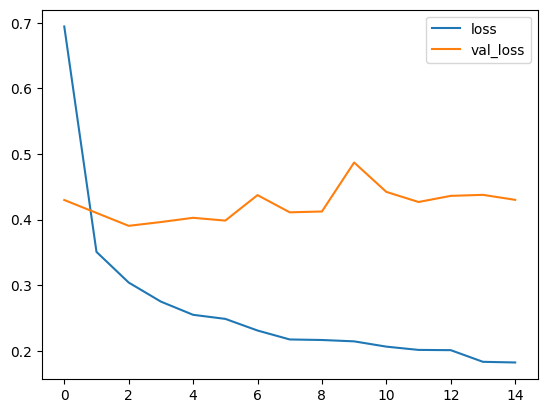

In [ ]:
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

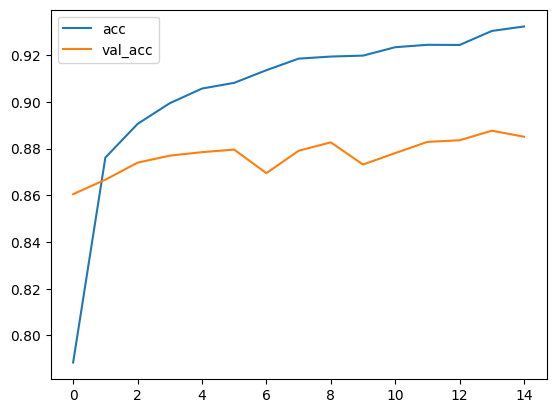

In [71]:
plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.legend()
plt.show()